In [ ]:
from google.colab import files
files.upload()

Saving ex1data1.txt to ex1data1.txt


{'ex1data1.txt': b'6.1101,17.592\n5.5277,9.1302\n8.5186,13.662\n7.0032,11.854\n5.8598,6.8233\n8.3829,11.886\n7.4764,4.3483\n8.5781,12\n6.4862,6.5987\n5.0546,3.8166\n5.7107,3.2522\n14.164,15.505\n5.734,3.1551\n8.4084,7.2258\n5.6407,0.71618\n5.3794,3.5129\n6.3654,5.3048\n5.1301,0.56077\n6.4296,3.6518\n7.0708,5.3893\n6.1891,3.1386\n20.27,21.767\n5.4901,4.263\n6.3261,5.1875\n5.5649,3.0825\n18.945,22.638\n12.828,13.501\n10.957,7.0467\n13.176,14.692\n22.203,24.147\n5.2524,-1.22\n6.5894,5.9966\n9.2482,12.134\n5.8918,1.8495\n8.2111,6.5426\n7.9334,4.5623\n8.0959,4.1164\n5.6063,3.3928\n12.836,10.117\n6.3534,5.4974\n5.4069,0.55657\n6.8825,3.9115\n11.708,5.3854\n5.7737,2.4406\n7.8247,6.7318\n7.0931,1.0463\n5.0702,5.1337\n5.8014,1.844\n11.7,8.0043\n5.5416,1.0179\n7.5402,6.7504\n5.3077,1.8396\n7.4239,4.2885\n7.6031,4.9981\n6.3328,1.4233\n6.3589,-1.4211\n6.2742,2.4756\n5.6397,4.6042\n9.3102,3.9624\n9.4536,5.4141\n8.8254,5.1694\n5.1793,-0.74279\n21.279,17.929\n14.908,12.054\n18.959,17.054\n7.2182,4.88

In [ ]:
import numpy as np

def load_data():
    data = np.loadtxt("ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y

def load_data_multi():
    data = np.loadtxt("ex1data2.txt", delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y


- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [ ]:
# load the dataset
x_train, y_train = load_data()

In [ ]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101

In [ ]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


It is often useful to understand the data by visualizing it.
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


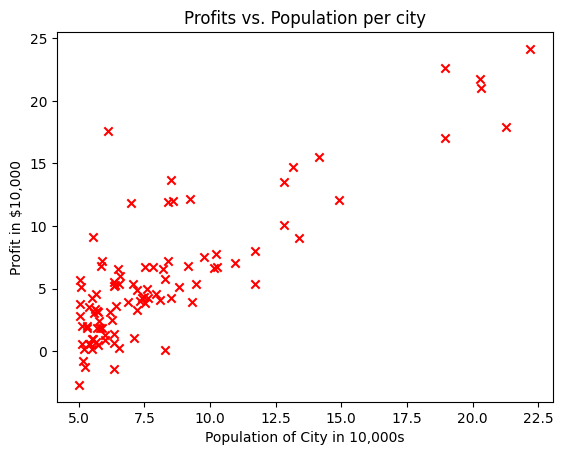

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

Your goal is to build a linear regression model to fit this data.
- With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

**Refresher on linear regression**

- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**.
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

**Compute Cost**

the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset
- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$


**Exercise 1:Compute Cost Function**

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [ ]:
def compute_cost(x,y,w,b):
  m=x.shape[0]
  total_cost=0
  for i in range(m):
    f_wb=np.dot(x[i],w)+b
    cost=(f_wb-y[i])**2
    total_cost +=cost
  return total_cost/(2*m)


In [ ]:
initial_w=2
initial_b=1
print(compute_cost(x_train,y_train,initial_w,initial_b))

75.20338497891959


**Gradient Descent**

the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

**Exercise 2:Compute Gradient**
* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b
    $$
   
    * The gradient for the parameters $w, b$ from that example
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)})
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)}
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

In [ ]:
def compute_gradient(x,y,w,b):
  m=x.shape[0]
  dj_dw=0
  dj_db=0
  for i in range(m):
    f_wb=w*x[i]+b
    dj_dw_i=(f_wb-y[i])*x[i]
    dj_db_i=f_wb-y[i]
    dj_dw +=dj_dw_i
    dj_db +=dj_db_i
  return dj_dw/m,dj_db/m

In [ ]:
#check
initial_w=0.2
initial_b=0.2
print(compute_gradient(x_train,y_train,initial_w,initial_b))

(-47.41610118114435, -4.007175051546391)


**Exercise 3:Compute Gradient Descent**

In [ ]:
import copy
import math
def gradient_descent(x,y,w,b,grad_func,cost_func,alpha,num_iters):
  m=x.shape[0]
  j_history=[] #for graphing
  w_history=[] #for graphing
  w_use=copy.deepcopy(w) #avoid modifying global w in the function
  b_use=b
  for i in range(num_iters):
    dj_dw,dj_db=grad_func(x,y,w_use,b_use)
    w_use=w_use - alpha*dj_dw
    b_use=b_use - alpha*dj_db
    if i<100000: #saving cost function after each iteration
      cost=cost_func(x,y,w_use,b_use)
      j_history.append(cost)
      #print cost every at intervals 10 times or as many iterations if i<10
      if i%math.ceil(num_iters/10)==0:
        w_history.append(w_use)
        print(f"Iterations {i:4}: Cost {float(j_history[-1]):8.2f} ")
  return w_use,b_use,j_history,w_history


In [ ]:
#checking
initial_w=0.
initial_b=0.
iterations=1500
alpha=0.01
w,b,J_hist,W_hist=gradient_descent(x_train,y_train,initial_w,initial_b,compute_gradient,compute_cost,alpha,iterations)
print(w,b)
print(len(J_hist))

Iterations    0: Cost     6.74 
Iterations  150: Cost     5.31 
Iterations  300: Cost     4.96 
Iterations  450: Cost     4.76 
Iterations  600: Cost     4.64 
Iterations  750: Cost     4.57 
Iterations  900: Cost     4.53 
Iterations 1050: Cost     4.51 
Iterations 1200: Cost     4.50 
Iterations 1350: Cost     4.49 
1.166362350335582 -3.63029143940436
1500


**Cost vs iterations of gradient descent**

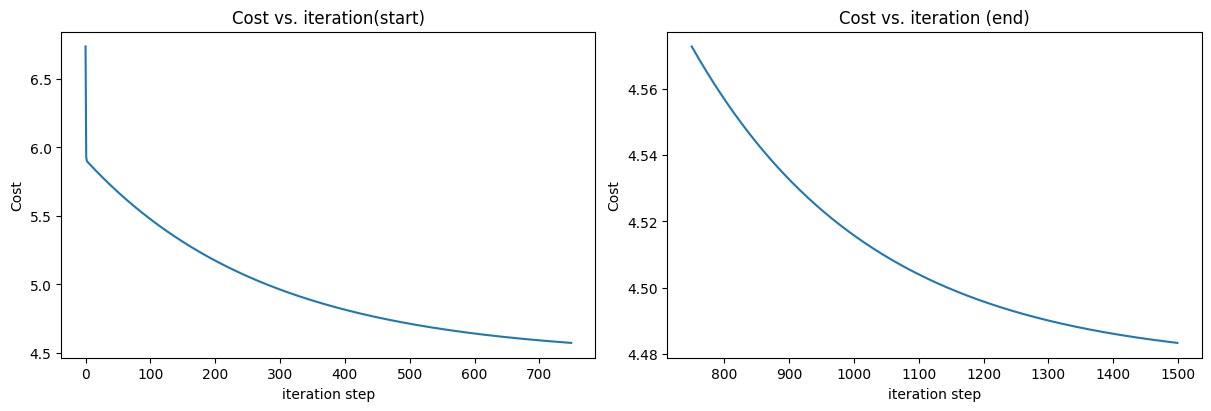

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:750])
ax2.plot(750 + np.arange(len(J_hist[750:])), J_hist[750:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Population of City in 10,000s')

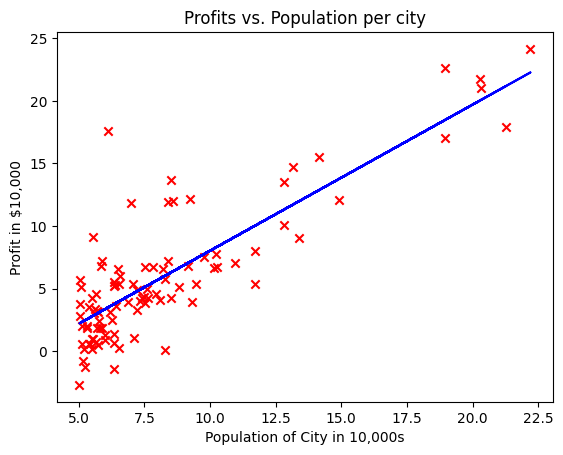

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people.

- The model takes in population of a city in 10,000s as input.

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`

In [ ]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
